# Projet 5 - Layerwise Relevance Propagation pour l'analyse d'image

Elyes KHALFALLAH & Edouard CHAPPON

MALIA

---

---


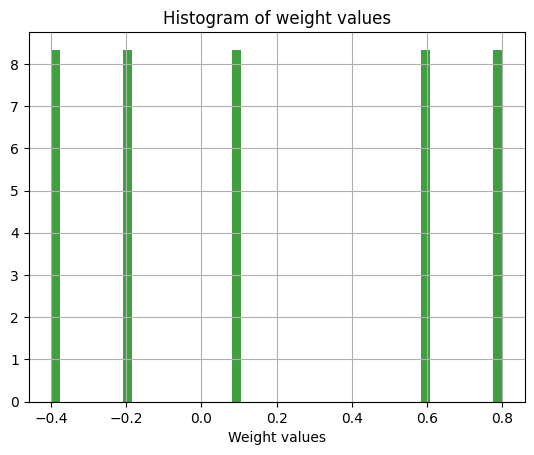

In [11]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################
# [1.] Define input, weights ===================================================
#      and see their distribution with a histogram =============================
################################################################################

# i: input layer, j: hidden layer, k: output layer

# 1.1. Values selected by user -------------------------------------------------
x_i_dict = {"x_1": 3, "x_2": 4, "x_3": -10}

w_j_1_dict = {"w_i1_j1": -0.2, "w_i2_j1": 0.5, "w_i3_j1": -0.1}
w_j_2_dict = {"w_i1_j2": -0.25, "w_i2_j2": 0.1, "w_i3_j2": 0.4}
w_j_3_dict = {"w_i1_j3": 0.2, "w_i2_j3": -0.3, "w_i3_j3": -0.2}
w_j_4_dict = {"w_i1_j4": 0.5, "w_i2_j4": -0.8, "w_i3_j4": 0.6}
w_j_5_dict = {"w_i1_j5": 0.1, "w_i2_j5": 0.4, "w_i3_j5": 0.7}

w_k_dict = {
    "w_j1_k1": 0.8,
    "w_j2_k1": 0.1,
    "w_j3_k1": -0.2,
    "w_j4_k1": -0.4,
    "w_j5_k1": 0.6,
}


# 1.2. Randomly (Normally distributed) values ----------------------------------
mu, sigma = 0, 0.05
x_i_normal = np.random.normal(mu, sigma, 3)

x_j_1_normal = np.random.normal(mu, sigma, 3)
x_j_2_normal = np.random.normal(mu, sigma, 3)
x_j_3_normal = np.random.normal(mu, sigma, 3)
x_j_4_normal = np.random.normal(mu, sigma, 3)
x_j_5_normal = np.random.normal(mu, sigma, 3)

x_k_normal = np.random.normal(mu, sigma, 5)


# Histogram of weights ---------------------------------------------------------
n, bins, patches = plt.hist(
    w_k_dict.values(), 50, density=True, facecolor="g", alpha=0.75
)


plt.xlabel("Weight values")
plt.title("Histogram of weight values")
plt.grid(True)
plt.show()


In [12]:
################################################################################
# [2.] Compute equations of feedforward pass ===================================
# Apply those equations to compute the output of the network ===================
################################################################################
sum_j1 = (
    x_i_dict["x_1"] * w_j_1_dict["w_i1_j1"]
    + x_i_dict["x_2"] * w_j_1_dict["w_i2_j1"]
    + x_i_dict["x_3"] * w_j_1_dict["w_i3_j1"]
)

sum_j2 = (
    x_i_dict["x_1"] * w_j_2_dict["w_i1_j2"]
    + x_i_dict["x_2"] * w_j_2_dict["w_i2_j2"]
    + x_i_dict["x_3"] * w_j_2_dict["w_i3_j2"]
)

sum_j3 = (
    x_i_dict["x_1"] * w_j_3_dict["w_i1_j3"]
    + x_i_dict["x_2"] * w_j_3_dict["w_i2_j3"]
    + x_i_dict["x_3"] * w_j_3_dict["w_i3_j3"]
)

sum_j4 = (
    x_i_dict["x_1"] * w_j_4_dict["w_i1_j4"]
    + x_i_dict["x_2"] * w_j_4_dict["w_i2_j4"]
    + x_i_dict["x_3"] * w_j_4_dict["w_i3_j4"]
)

sum_j5 = (
    x_i_dict["x_1"] * w_j_5_dict["w_i1_j5"]
    + x_i_dict["x_2"] * w_j_5_dict["w_i2_j5"]
    + x_i_dict["x_3"] * w_j_5_dict["w_i3_j5"]
)

# Apply ReLU -------------------------------------------------------------------
val_j1 = max(0, sum_j1)
val_j2 = max(0, sum_j2)
val_j3 = max(0, sum_j3)
val_j4 = max(0, sum_j4)
val_j5 = max(0, sum_j5)

# Compute the output of the NN -------------------------------------------------
val_k1 = val_j1 + val_j2 + val_j3 + val_j4 + val_j5
print(f"Output value of the network: {val_k1}")


Output value of the network: 3.8


In [13]:
################################################################################
################################################################################
################################################################################
# [3.] Compute the relevances of each neuron in all layers =====================
# The relevances computations follow the mathematical formulas defined above. ==
################################################################################
################################################################################
################################################################################

################################################################################
# [3.1] Compute relevance of output layer (k) ==================================
################################################################################
R_k = val_k1

print(f"Relevances of neurons of k layer: {R_k}")

################################################################################
# [3.2] Compute relevance of every one of the 5 neurons of the layer (j) =======
################################################################################
R_j1 = val_j1
R_j2 = val_j2
R_j3 = val_j3
R_j4 = val_j4
R_j5 = val_j5

print(f"Relevances of neurons of j layer: {R_j1}, {R_j2}, {R_j3}, {R_j4}, {R_j5}")

################################################################################
# [3.3] Compute relevance of every one of the 3 neurons of the layer (i) =======
################################################################################
sum_j1_power = (
    w_j_1_dict["w_i1_j1"] ** 2 + w_j_1_dict["w_i2_j1"] ** 2 + w_j_1_dict["w_i3_j1"] ** 2
)

sum_j2_power = (
    w_j_2_dict["w_i1_j2"] ** 2 + w_j_2_dict["w_i2_j2"] ** 2 + w_j_2_dict["w_i3_j2"] ** 2
)

sum_j3_power = (
    w_j_3_dict["w_i1_j3"] ** 2 + w_j_3_dict["w_i2_j3"] ** 2 + w_j_3_dict["w_i3_j3"] ** 2
)

sum_j4_power = (
    w_j_4_dict["w_i1_j4"] ** 2 + w_j_4_dict["w_i2_j4"] ** 2 + w_j_4_dict["w_i3_j4"] ** 2
)

sum_j5_power = (
    w_j_5_dict["w_i1_j5"] ** 2 + w_j_5_dict["w_i2_j5"] ** 2 + w_j_5_dict["w_i3_j5"] ** 2
)

R_i1 = (
    ((w_j_1_dict["w_i1_j1"] ** 2) / sum_j1_power) * R_j1
    + ((w_j_2_dict["w_i1_j2"] ** 2) / sum_j2_power) * R_j2
    + ((w_j_3_dict["w_i1_j3"] ** 2) / sum_j3_power) * R_j3
    + ((w_j_4_dict["w_i1_j4"] ** 2) / sum_j4_power) * R_j4
    + ((w_j_5_dict["w_i1_j5"] ** 2) / sum_j5_power) * R_j5
)

R_i2 = (
    ((w_j_1_dict["w_i2_j1"] ** 2) / sum_j1_power) * R_j1
    + ((w_j_2_dict["w_i2_j2"] ** 2) / sum_j2_power) * R_j2
    + ((w_j_3_dict["w_i2_j3"] ** 2) / sum_j3_power) * R_j3
    + ((w_j_4_dict["w_i2_j4"] ** 2) / sum_j4_power) * R_j4
    + ((w_j_5_dict["w_i2_j5"] ** 2) / sum_j5_power) * R_j5
)

R_i3 = (
    ((w_j_1_dict["w_i3_j1"] ** 2) / sum_j1_power) * R_j1
    + ((w_j_2_dict["w_i3_j2"] ** 2) / sum_j2_power) * R_j2
    + ((w_j_3_dict["w_i3_j3"] ** 2) / sum_j3_power) * R_j3
    + ((w_j_4_dict["w_i3_j4"] ** 2) / sum_j4_power) * R_j4
    + ((w_j_5_dict["w_i3_j5"] ** 2) / sum_j5_power) * R_j5
)


print(f"Relevances of neurons of i layer: {R_i1}, {R_i2}, {R_i3}")


Relevances of neurons of k layer: 3.8
Relevances of neurons of j layer: 2.4, 0, 1.4000000000000001, 0, 0
Relevances of neurons of i layer: 0.6494117647058824, 2.741176470588235, 0.4094117647058824


In [14]:
################################################################################
################################################################################
################################################################################
# [4.] Check that the computations of the relevance obay =======================
# the positivity and conservativity properties =================================
# (see cell above), with the help of assertions and unit tests =================
################################################################################
################################################################################
################################################################################


################################################################################
# [4.1] Check positivity =======================================================
################################################################################

assert R_k >= 0, "Relevance of every neuron of every layer must be positive"

assert R_j1 >= 0, "Relevance of every neuron of every layer must be positive"
assert R_j2 >= 0, "Relevance of every neuron of every layer must be positive"
assert R_j3 >= 0, "Relevance of every neuron of every layer must be positive"
assert R_j4 >= 0, "Relevance of every neuron of every layer must be positive"
assert R_j5 >= 0, "Relevance of every neuron of every layer must be positive"

assert R_i1 >= 0, "Relevance of every neuron of every layer must be positive"
assert R_i2 >= 0, "Relevance of every neuron of every layer must be positive"
assert R_i3 >= 0, "Relevance of every neuron of every layer must be positive"


################################################################################
# [4.2] Check conservativity ===================================================
################################################################################
sum_Rj = R_j1 + R_j2 + R_j3 + R_j4 + R_j5
print(f" Conservativity j --to--> k: sum_Rj: {sum_Rj}, R_k: {R_k}")


sum_Ri = R_i1 + R_i2 + R_i3
print(f" Conservativity i --to--> j: sum_Ri: {sum_Ri}, sum_Rj: {sum_Rj}")


 Conservativity j --to--> k: sum_Rj: 3.8, R_k: 3.8
 Conservativity i --to--> j: sum_Ri: 3.8, sum_Rj: 3.8


In [15]:
import unittest


class TestLRPProperties(unittest.TestCase):

    def test_relevance_positivity(self):

        assert R_k >= 0, "Relevance of every neuron of every layer must be positive"

        assert R_j1 >= 0, "Relevance of every neuron of every layer must be positive"
        assert R_j2 >= 0, "Relevance of every neuron of every layer must be positive"
        assert R_j3 >= 0, "Relevance of every neuron of every layer must be positive"
        assert R_j4 >= 0, "Relevance of every neuron of every layer must be positive"
        assert R_j5 >= 0, "Relevance of every neuron of every layer must be positive"

        assert R_i1 >= 0, "Relevance of every neuron of every layer must be positive"
        assert R_i2 >= 0, "Relevance of every neuron of every layer must be positive"
        assert R_i3 >= 0, "Relevance of every neuron of every layer must be positive"

    def test_relevance_conservativity(self):
        self.assertEqual(R_k, R_j1 + R_j2 + R_j3 + R_j4 + R_j5)
        self.assertEqual(R_j1 + R_j2 + R_j3 + R_j4 + R_j5, R_i1 + R_i2 + R_i3)


unittest.main(argv=[""], verbosity=2, exit=False)


test_relevance_conservativity (__main__.TestLRPProperties.test_relevance_conservativity) ... ok
test_relevance_positivity (__main__.TestLRPProperties.test_relevance_positivity) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK
